# 基于佰利联行情数据的基本分布分析
> v0.1
> 
> 20160414
> 
> 主要是涨幅和价格的分析

导入模块

In [1]:
import tushare as ts
import pylab
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
code='002601'

### 获得基础信息

In [2]:
bi=ts.get_stock_basics()
name=bi.ix[code].name
st=bi.ix[code].timeToMarket
st=str(st)
starttime=st[:4]+'-'+st[4:6]+'-'+st[6:8]
bi.ix[code]

name                     佰利联
industry                化工原料
area                      河南
pe                    100.44
outstanding          16451.3
totals               20442.4
totalAssets           576104
liquidAssets          212005
fixedAssets           193292
reserved              140450
reservedPerShare        6.87
esp                     0.57
bvps                   11.24
pb                      4.87
timeToMarket        20110715
Name: 002601, dtype: object

### 获得近三年的日线数据

In [3]:
dp=ts.get_hist_data(code)
dp[:5]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2016-04-20,55.99,56.45,49.28,49.28,253308.62,-5.47,-9.99,54.266,56.539,56.709,184613.86,186532.70,204003.53,15.40
2016-04-19,55.78,55.99,54.75,54.20,120172.76,-1.05,-1.88,55.270,58.027,56.826,170606.19,180973.48,200921.25,7.30
2016-04-18,54.60,56.60,55.80,53.38,150179.69,0.53,0.96,55.328,58.712,56.563,189777.63,188023.69,203048.17,9.13
2016-04-15,55.50,56.19,55.27,54.14,163619.41,-0.96,-1.71,56.398,59.282,56.186,191563.70,197614.21,204585.62,9.95
2016-04-14,53.90,56.34,56.23,52.50,235788.80,1.93,3.55,57.418,59.557,55.748,198116.61,212238.62,203461.62,14.33


### 获得涨幅数据列，并绘制涨幅分布图

最小值： -10.01
最大值： 10.02
平均值： 0.203839285714
标准差： 3.70341919081


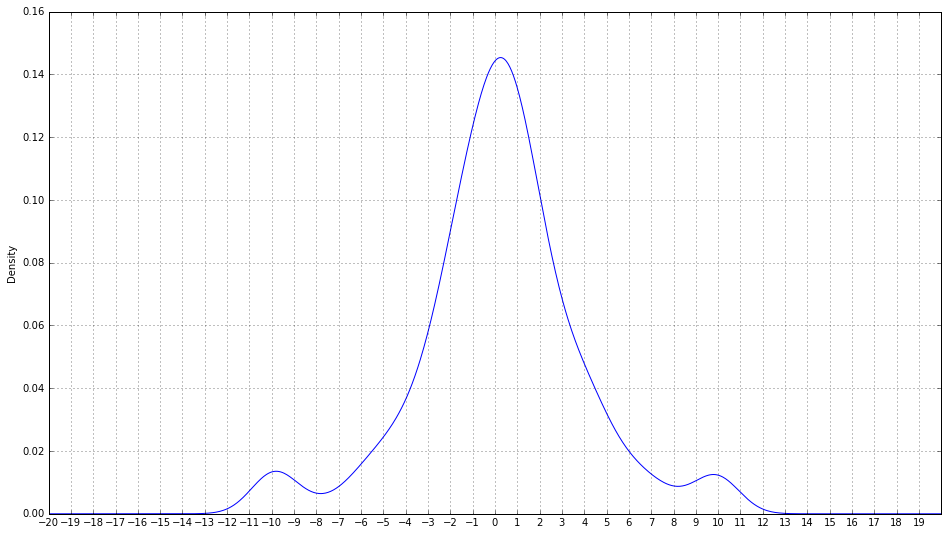

In [4]:
pc=dp.p_change
pxt=np.arange(-20,20,1)
pxl=[-20,20]
pc.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
print '最小值：',pc.min()
print '最大值：',pc.max()
print '平均值：',pc.mean()
print '标准差：',pc.std()

-  

-  

### 近20日的涨幅数据及分布图

最小值： -9.99
最大值： 10.0
平均值： -0.103
标准差： 5.15856273333


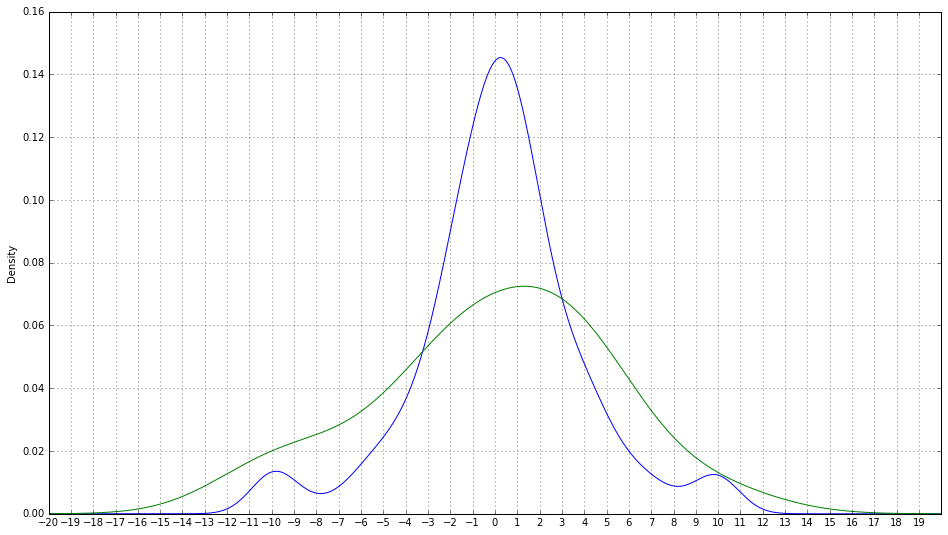

In [5]:
pc20=dp[:20].p_change
pc.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
pc20.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
print '最小值：',pc20.min()
print '最大值：',pc20.max()
print '平均值：',pc20.mean()
print '标准差：',pc20.std()

- 根据月内数据与三年数据的比较，判断近期行情的重心

### 分析三年数据的收盘价分布情况

最小值： 15.16
最大值： 64.16
平均值： 25.7485714286
标准差： 10.1548464367


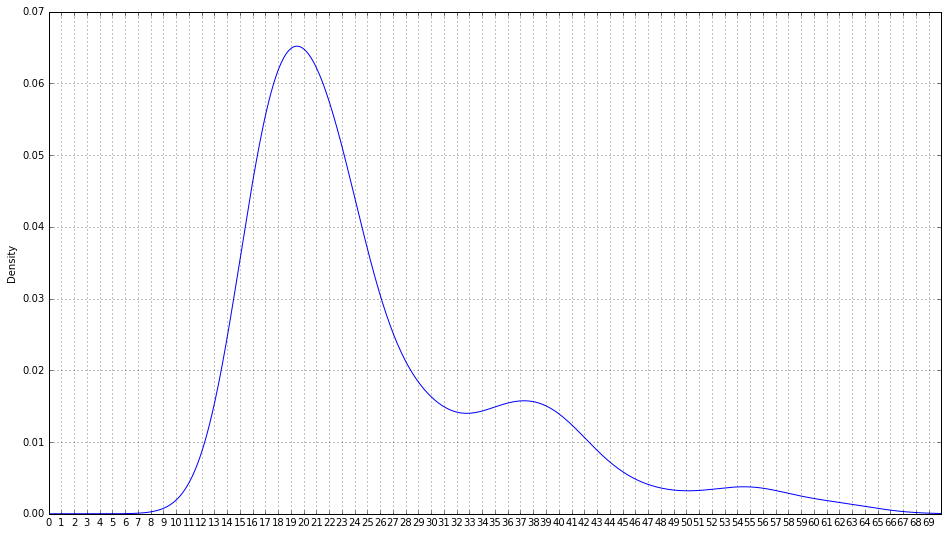

In [6]:
close=dp.close
maxi=10*(close.max()//10+1)
cxt=np.arange(0,maxi,1)
cxl=[0,maxi]
close.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',close.min()
print '最大值：',close.max()
print '平均值：',close.mean()
print '标准差：',close.std()

- 此图基本反应了 

 - 

 -  

近20日收盘价分布情况对比

最小值： 49.28
最大值： 64.16
平均值： 56.709
标准差： 4.09307232438


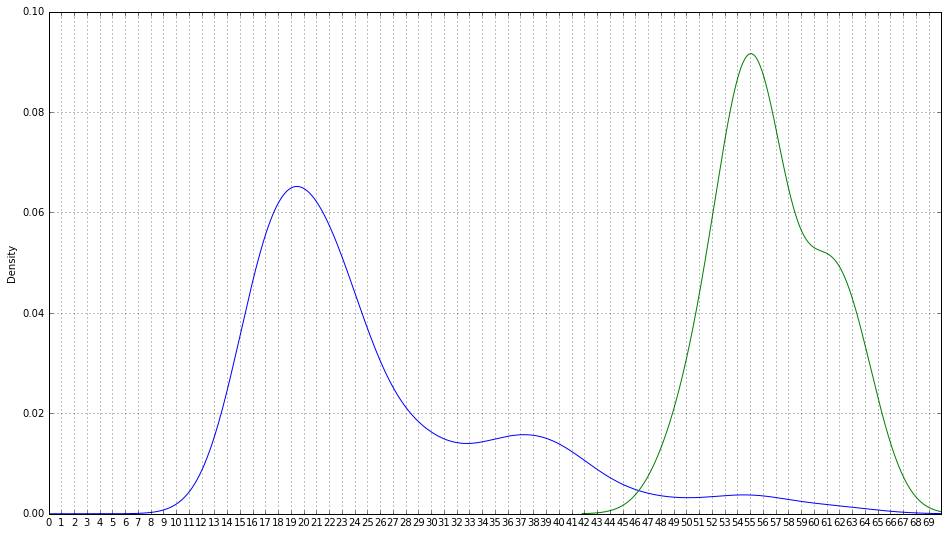

In [7]:
close20=dp[:20].close
close.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
close20.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',close20.min()
print '最大值：',close20.max()
print '平均值：',close20.mean()
print '标准差：',close20.std()

近20日的收盘价数据与三年数据的对比，判断目前价格位置

### 对全部数据的收盘价分析

#### 获取全部数据

前复权数据

In [9]:
dfqfq=ts.get_h_data(code,start=starttime) 
dfqfq[:5]

[Getting data:]###################

,open,high,close,low,volume,amount
date,,,,,,
2016-04-20,55.99,56.45,49.28,49.28,25330862,1312142336
2016-04-19,55.78,55.99,54.75,54.20,12017276,660012480
2016-04-18,54.60,56.60,55.80,53.38,15017969,833531456
2016-04-15,55.50,56.19,55.27,54.14,16361941,900802624
2016-04-14,53.90,56.34,56.23,52.50,23578880,1287532288


简单分析

In [10]:
dfqfq.describe()

,open,high,close,low,volume,amount
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1.091000e+03
mean,29.915665,30.714867,29.979083,29.261338,4171905.244730,1.592779e+08
std,12.341090,12.807910,12.361604,11.955638,3940549.810367,2.040457e+08
min,14.980000,15.230000,15.080000,14.830000,14988.000000,7.336630e+05
25%,20.190000,20.665000,20.215000,19.880000,1683142.000000,4.826315e+07
50%,24.480000,25.090000,24.550000,24.120000,2915674.000000,9.405773e+07
75%,39.975000,40.740000,40.155000,38.960000,5159948.000000,1.847871e+08
max,64.000000,65.600000,64.160000,62.190000,30986352.000000,1.812945e+09


除权数据

In [11]:
df=ts.get_h_data(code,start=starttime,autype='None') 
df[:5]

[Getting data:]###################

,open,high,close,low,volume,amount
date,,,,,,
2016-04-20,55.99,56.45,49.28,49.28,25330862,1312142336
2016-04-19,55.78,55.99,54.75,54.20,12017276,660012480
2016-04-18,54.60,56.60,55.80,53.38,15017969,833531456
2016-04-15,55.50,56.19,55.27,54.14,16361941,900802624
2016-04-14,53.90,56.34,56.23,52.50,23578880,1287532288


简单分析

In [12]:
df.describe()

,open,high,close,low,volume,amount
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1.091000e+03
mean,40.896013,41.978469,40.984565,40.019276,4171905.244730,1.592779e+08
std,30.748320,31.632596,30.831478,30.077696,3940549.810367,2.040457e+08
min,15.060000,15.320000,15.160000,14.910000,14988.000000,7.336630e+05
25%,20.345000,20.780000,20.415000,20.020000,1683142.000000,4.826315e+07
50%,24.710000,25.290000,24.770000,24.340000,2915674.000000,9.405773e+07
75%,49.525000,51.630000,49.240000,48.480000,5159948.000000,1.847871e+08
max,129.000000,133.300000,129.000000,125.700000,30986352.000000,1.812945e+09


#### 收盘价分析

前复权收盘价分析

 
最小值： 15.08
最大值： 64.16
平均值： 29.9790834097
标准差： 12.3616040675


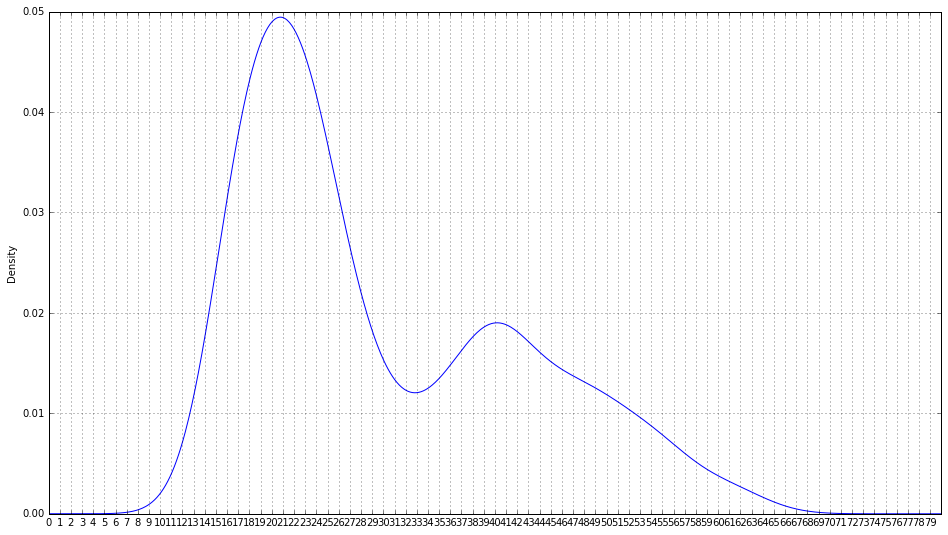

In [13]:
closeallqfq=dfqfq.close
qxt=np.arange(0,80,1)
qxl=[0,80]
closeallqfq.plot(kind='kde',grid=True,figsize=(16,9),xticks=qxt,xlim=qxl)
print ' '
print '最小值：',closeallqfq.min()
print '最大值：',closeallqfq.max()
print '平均值：',closeallqfq.mean()
print '标准差：',closeallqfq.std()

- 数据是前复权数据，因此最大值和最小值都向下滑动了。特点为：

 -  
 
  -  

与20日收盘价对比

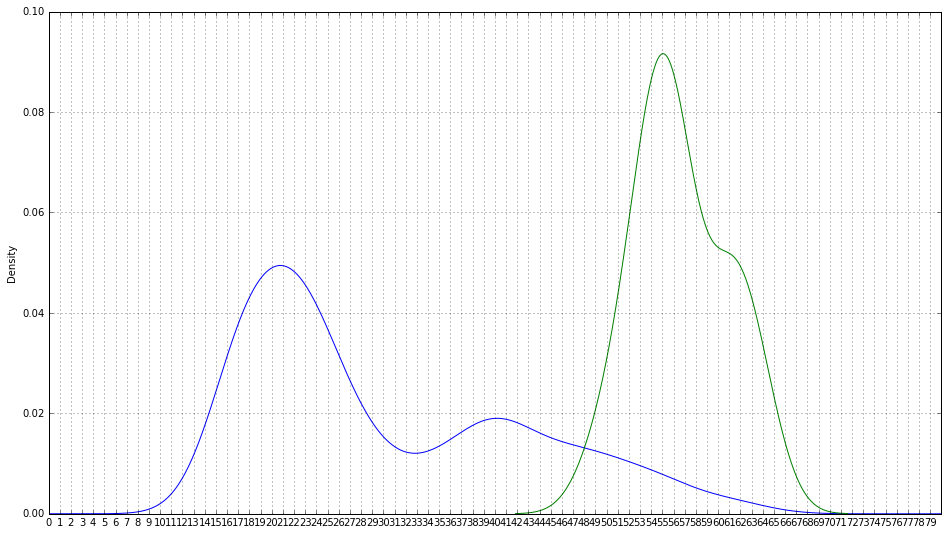

In [14]:
closeallqfq20=dfqfq[:20].close
closeallqfq.plot(kind='kde',grid=True,figsize=(16,9),xticks=qxt,xlim=qxl)
closeallqfq20.plot(kind='kde',grid=True,figsize=(16,9),xticks=qxt,xlim=qxl)

上涨概率简单分析

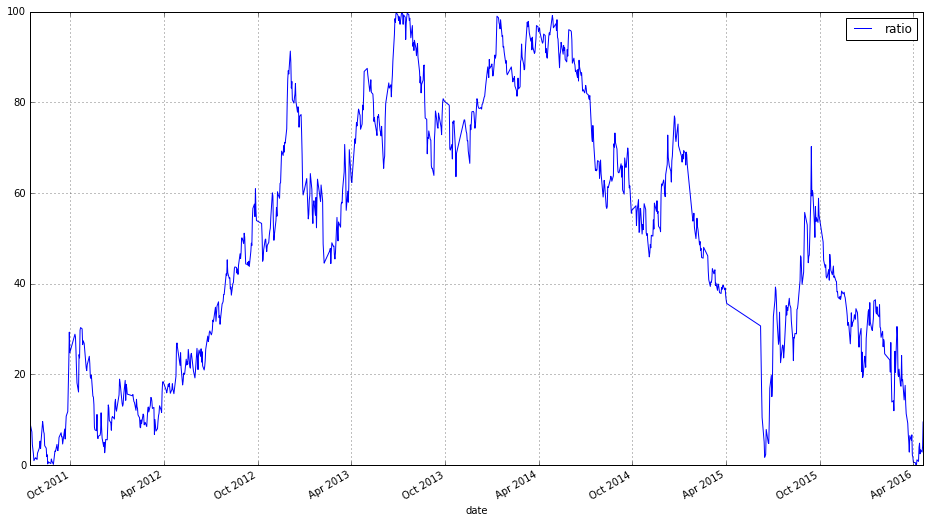

In [24]:
qfqrat=pd.DataFrame([100-stats.percentileofscore(dfqfq.close,f) for f in dfqfq.close],index=dfqfq.index,columns=['ratio'])
qfqrat.plot(grid=True,figsize=(16,9))

收盘价比对

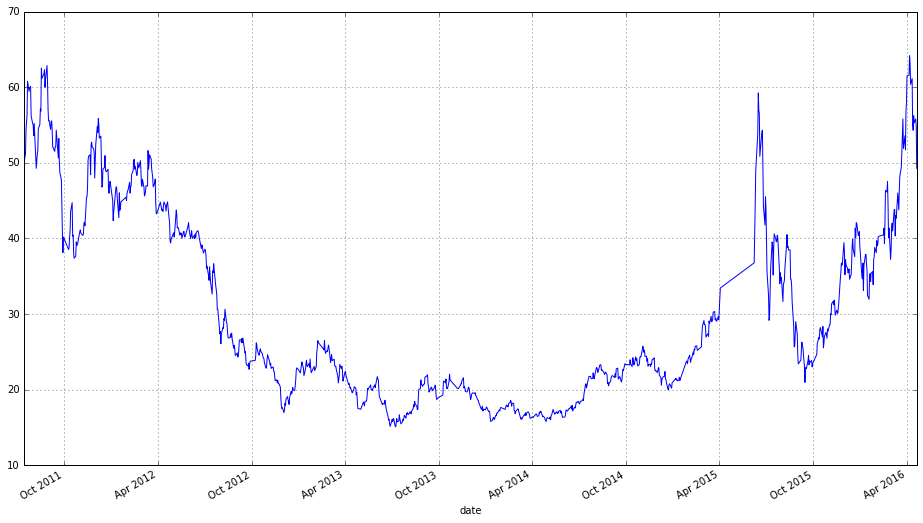

In [25]:
dfqfq.close.plot(grid=True,figsize=(16,9))

除权数据收盘价分析

最小值： 15.16
最大值： 129.0
平均值： 40.9845646196
标准差： 30.8314780326


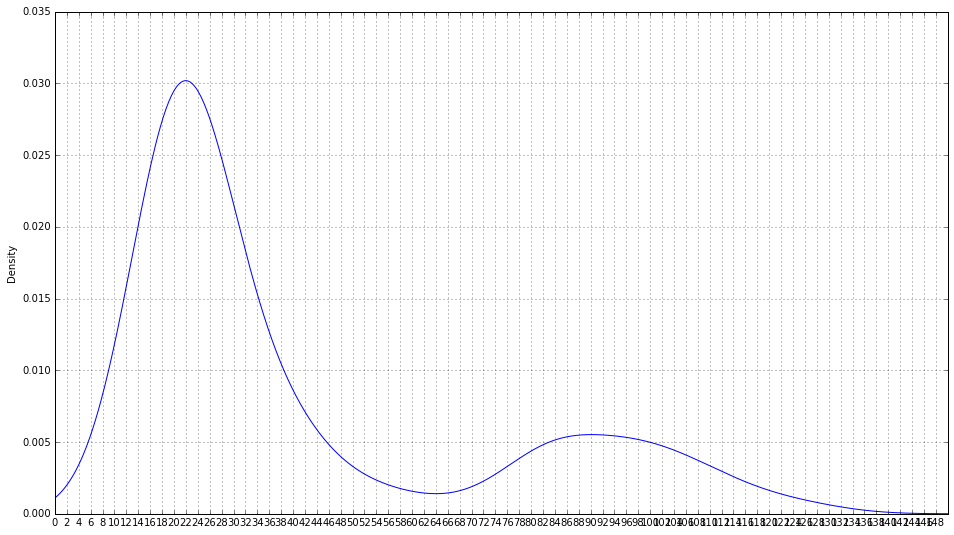

In [15]:
closeall=df.close
nxt=np.arange(0,150,2)
nxl=[0,150]
closeall.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)
print '最小值：',closeall.min()
print '最大值：',closeall.max()
print '平均值：',closeall.mean()
print '标准差：',closeall.std()

- 除权数据的分析中，价格范围相比三年数据扩大不多。特点为：

 -  
 
 -  
 
  -  

与20日收盘价对比

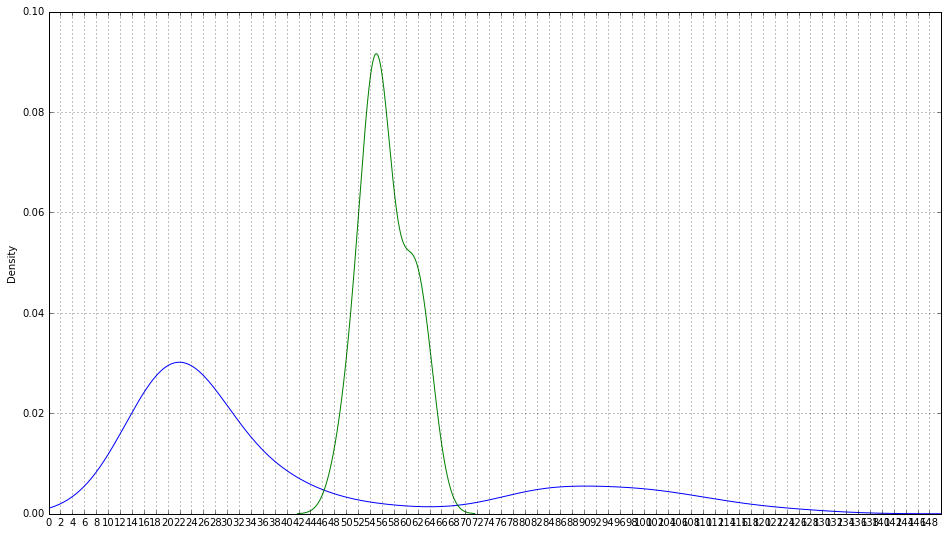

In [16]:
closeall20=df[:20].close
closeall.plot(kind='kde',grid=True,figsize=(16,9))
closeall20.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)

上涨概率简单分析

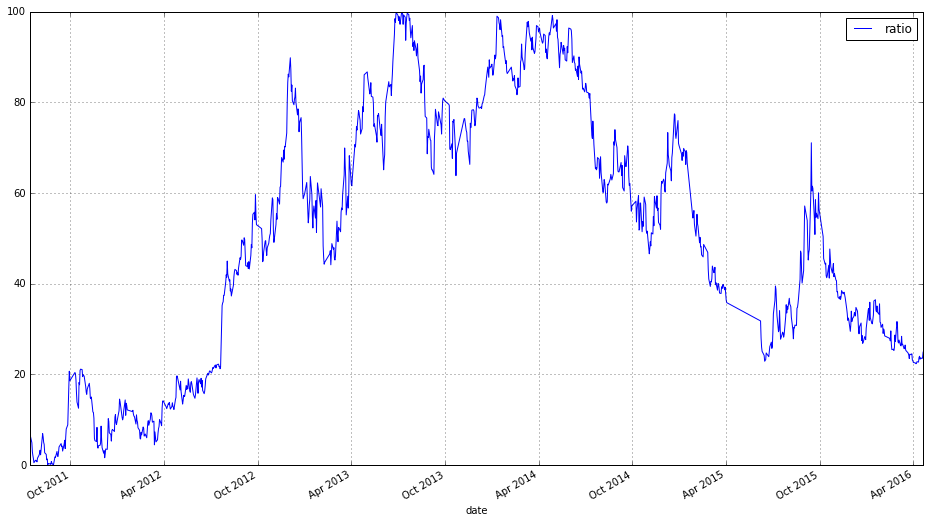

In [26]:
rat=pd.DataFrame([100-stats.percentileofscore(df.close,f) for f in df.close],index=df.index,columns=['ratio'])
rat.plot(grid=True,figsize=(16,9))

收盘价对比

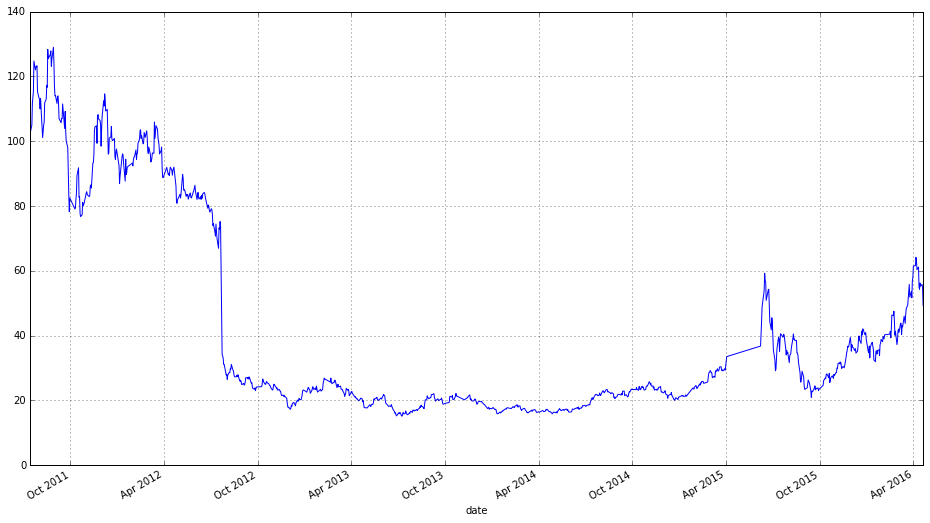

In [27]:
df.close.plot(grid=True,figsize=(16,9))

*三个月多阶段对比*

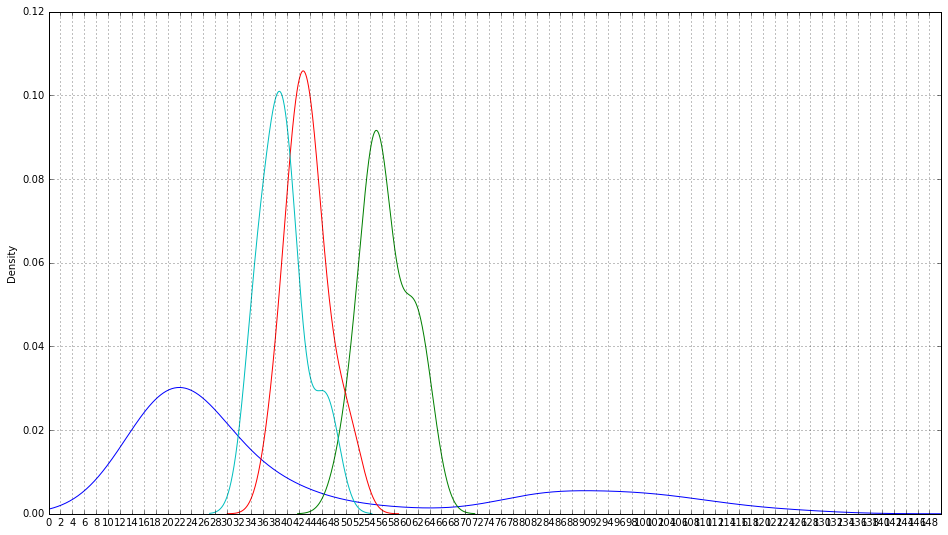

In [17]:
closeall40=df[20:40].close
closeall60=df[40:60].close
closeall.plot(kind='kde',grid=True,figsize=(16,9))
closeall20.plot(kind='kde',grid=True,figsize=(16,9))
closeall40.plot(kind='kde',grid=True,figsize=(16,9))
closeall60.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)

In [18]:
closeall20.describe()

count    20.000000
mean     56.709000
std       4.093072
min      49.280000
25%      54.150000
50%      55.800000
75%      60.565000
max      64.160000
Name: close, dtype: float64

In [19]:
closeall40.describe()

count    20.000000
mean     43.516000
std       3.599432
min      37.220000
25%      41.265000
50%      43.380000
75%      45.077500
max      51.610000
Name: close, dtype: float64

In [20]:
closeall60.describe()

count    20.000000
mean     39.378500
std       3.883961
min      33.880000
25%      36.855000
50%      39.070000
75%      40.682500
max      47.500000
Name: close, dtype: float64

### 三年数据的换手率分析

最小值： 0.01
最大值： 18.84
平均值： 3.43308035714
标准差： 2.64522991759


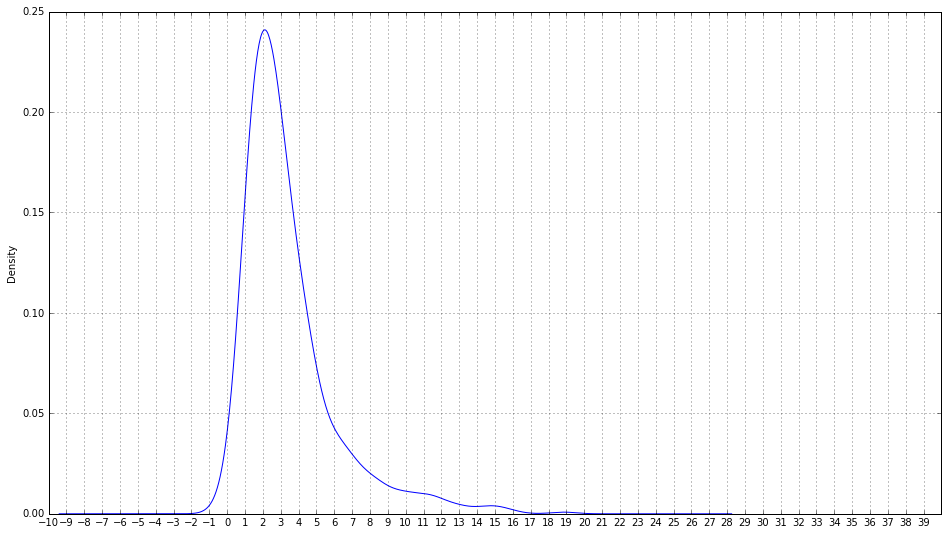

In [21]:
turnover=dp.turnover
txt=np.arange(-10,40,1)
txl=[-10,40]
turnover.plot(kind='kde',grid=True,figsize=(16,9),xticks=txt,xlim=txl)
print '最小值：',turnover.min()
print '最大值：',turnover.max()
print '平均值：',turnover.mean()
print '标准差：',turnover.std()

### 三年数据和全部数据的基本统计对比

- 三年数据：

In [22]:
dp.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.00000
mean,25.680104,26.412500,25.748571,25.080372,51016.293929,0.044092,0.203839,25.651484,25.516400,25.221490,50529.307054,49916.948661,48581.800179,3.43308
std,10.167310,10.675412,10.154846,9.682365,44389.272284,1.291240,3.703419,9.974017,9.711368,9.104792,39664.099369,37423.120264,33864.004576,2.64523
min,15.060000,15.320000,15.160000,14.910000,149.880000,-6.110000,-10.010000,15.624000,15.717000,15.882000,450.260000,8479.430000,12036.530000,0.01000
25%,18.085000,18.490000,18.157500,17.857500,22314.837500,-0.352500,-1.535000,18.202000,18.177500,18.310250,24565.570000,26968.440000,28201.585000,1.73000
50%,21.805000,22.295000,21.820000,21.415000,37714.995000,0.055000,0.260000,21.786000,21.853000,21.798000,40706.515000,41368.685000,42133.130000,2.69500
75%,29.827500,30.650000,29.930000,29.115000,64059.370000,0.412500,1.965000,29.889500,29.909000,29.515500,61332.432500,59104.380000,55410.767500,4.16000
max,64.000000,65.600000,64.160000,62.190000,309863.530000,5.390000,10.020000,62.166000,59.621000,56.826000,232572.200000,221915.920000,204585.620000,18.84000


- 全部前复权数据：

In [23]:
df.describe()

,open,high,close,low,volume,amount
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1.091000e+03
mean,40.896013,41.978469,40.984565,40.019276,4171905.244730,1.592779e+08
std,30.748320,31.632596,30.831478,30.077696,3940549.810367,2.040457e+08
min,15.060000,15.320000,15.160000,14.910000,14988.000000,7.336630e+05
25%,20.345000,20.780000,20.415000,20.020000,1683142.000000,4.826315e+07
50%,24.710000,25.290000,24.770000,24.340000,2915674.000000,9.405773e+07
75%,49.525000,51.630000,49.240000,48.480000,5159948.000000,1.847871e+08
max,129.000000,133.300000,129.000000,125.700000,30986352.000000,1.812945e+09
